In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2060.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_559.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3273.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_124.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1849.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_139.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2137.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2438.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_553.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2661.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_966.jp

In [2]:
import cv2
import os
import numpy as np
import pandas as pd 
import keras
from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import seaborn as sns

2024-03-15 22:40:20.312874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 22:40:20.312981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 22:40:20.462165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
with_mask='/kaggle/input/face-mask-dataset/data/with_mask'
without_mask='/kaggle/input/face-mask-dataset/data/without_mask'
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

,Number
with_mask,3725
without_mask,3828


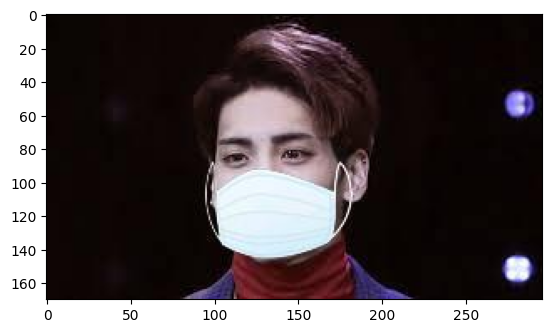

In [4]:
#Show With Mask Image
filenames = os.listdir("/kaggle/input/face-mask-dataset/data/with_mask")
sample = random.choice(filenames)
image = load_img("/kaggle/input/face-mask-dataset/data/with_mask/"+sample)
plt.imshow(image)

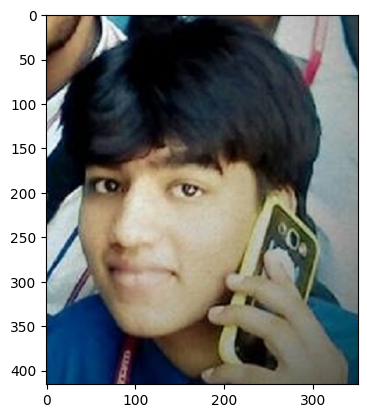

In [5]:
# displaying without mask image
filenames = os.listdir("/kaggle/input/face-mask-dataset/data/without_mask")
sample_filename = random.choice(filenames)
img= load_img("/kaggle/input/face-mask-dataset/data/without_mask/" + sample_filename)
imgplot = plt.imshow(img)
plt.show()

In [6]:
# without_mask = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
# with_mask = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')

In [7]:
print(f'Number of with mask images:{len(os.listdir(with_mask))}')
print(f'Number of without mask images:{len(os.listdir(without_mask))}')

Number of with mask images:3725
Number of without mask images:3828


In [8]:
label=[]
data=[]
size=[]
#with mask label 1
for img in os.listdir(with_mask):
    img_arr=cv2.imread(os.path.join(with_mask,img))
    data.append(img_arr)
    label.append(1)
    size.append(img_arr.shape)
#without mask label 0
for img in os.listdir(without_mask):
    img_arr=cv2.imread(os.path.join(without_mask,img))
    data.append(img_arr)
    label.append(0)
    size.append(img_arr.shape)

In [9]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 254, 252],
        [253, 253, 253],
        [253, 252, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 254],
        [253, 252, 254],
        [252, 251, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 254, 255],
        [255, 253, 255]]

In [10]:
label[0:5]

[1, 1, 1, 1, 1]

In [11]:
#Resize Image
Size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(Size,Size))

In [12]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(label)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [14]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6797, 128, 128, 3) (756, 128, 128, 3)


In [15]:
print('X Train Shape is :',x_train.shape)
print('X Test Shape is :',x_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)

X Train Shape is : (6797, 128, 128, 3)
X Test Shape is : (756, 128, 128, 3)
Y Train Shape is : (6797,)
Y Test Shape is : (756,)


In [16]:
# scaling the data

x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0],x_train_scaled[0]

(array([[[ 44,  35,  45],
         [ 42,  33,  43],
         [ 43,  34,  44],
         ...,
         [234, 235, 239],
         [234, 235, 239],
         [234, 235, 239]],
 
        [[ 46,  37,  47],
         [ 43,  34,  44],
         [ 42,  33,  43],
         ...,
         [234, 235, 239],
         [234, 235, 239],
         [234, 235, 239]],
 
        [[ 39,  30,  40],
         [ 39,  30,  40],
         [ 41,  32,  42],
         ...,
         [234, 235, 239],
         [234, 235, 239],
         [234, 235, 239]],
 
        ...,
 
        [[108, 130, 178],
         [113, 136, 184],
         [116, 138, 186],
         ...,
         [202, 194, 201],
         [158, 149, 158],
         [180, 172, 181]],
 
        [[115, 135, 183],
         [115, 136, 184],
         [115, 137, 185],
         ...,
         [177, 162, 177],
         [184, 165, 182],
         [147, 133, 147]],
 
        [[112, 134, 182],
         [115, 137, 186],
         [116, 138, 186],
         ...,
         [212, 196, 213],
  

In [17]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

#feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#classifier

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(126, activation='relu'))
model.add(Dense(2, activation='sigmoid')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 126)            │        64,638 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           254 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 2,558,076 (9.76 MB)

 Trainable params: 2,556,476 (9.75 MB)

 Non-trainable params: 1,600 (6.25 KB)

In [19]:
epochs=12

In [20]:
history = model.fit(x_train_scaled, y_train, epochs=epochs,validation_split=0.15)

Epoch 1/12


2024-03-15 22:41:41.836151: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31758: 7.18885, expected 6.34915
2024-03-15 22:41:41.836225: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31794: 6.79032, expected 5.95062
2024-03-15 22:41:41.836234: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31795: 6.91364, expected 6.07395
2024-03-15 22:41:41.836241: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31796: 7.21123, expected 6.37153
2024-03-15 22:41:41.836249: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31809: 7.14567, expected 6.30597
2024-03-15 22:41:41.836257: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31823: 7.30269, expected 6.46299
2024-03-15 22:41:41.836264: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31824: 7.17199, expected 6.33229
2024-03-15 22:41:41.836272:

  9/181 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.6450 - loss: 0.9916

I0000 00:00:1710542509.543229      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


177/181 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8211 - loss: 0.4871

2024-03-15 22:41:56.122611: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47628: 7.69785, expected 6.81598
2024-03-15 22:41:56.122686: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47631: 7.05885, expected 6.17698
2024-03-15 22:41:56.122696: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47632: 7.43824, expected 6.55638
2024-03-15 22:41:56.122704: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47633: 6.59176, expected 5.7099
2024-03-15 22:41:56.122711: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47634: 5.68544, expected 4.80357
2024-03-15 22:41:56.122719: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47635: 5.61578, expected 4.73391
2024-03-15 22:41:56.122727: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47636: 6.20559, expected 5.32372
2024-03-15 22:41:56.122734: 

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - acc: 0.8219 - loss: 0.4845

2024-03-15 22:42:05.680847: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.87683, expected 5.18843
2024-03-15 22:42:05.680913: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.04562, expected 4.35721
2024-03-15 22:42:05.680922: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 4.98661, expected 4.29821
2024-03-15 22:42:05.680930: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.58192, expected 4.89352
2024-03-15 22:42:05.680938: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.82489, expected 5.13649
2024-03-15 22:42:05.680945: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.71926, expected 5.03086
2024-03-15 22:42:05.680953: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 4.72106, expected 4.03266
2024-03-15 22:42:05.680960: E external/local_xla/xla

181/181 ━━━━━━━━━━━━━━━━━━━━ 33s 96ms/step - acc: 0.8221 - loss: 0.4838 - val_acc: 0.5127 - val_loss: 4.4636
Epoch 2/12
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8993 - loss: 0.2642 - val_acc: 0.8196 - val_loss: 0.5956
Epoch 3/12
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9279 - loss: 0.1880 - val_acc: 0.8157 - val_loss: 0.5185
Epoch 4/12
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9416 - loss: 0.1604 - val_acc: 0.8775 - val_loss: 0.4340
Epoch 5/12
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9376 - loss: 0.1534 - val_acc: 0.9167 - val_loss: 0.2110
Epoch 6/12
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9542 - loss: 0.1214 - val_acc: 0.9255 - val_loss: 0.1666
Epoch 7/12
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9537 - loss: 0.1110 - val_acc: 0.9127 - val_loss: 0.1880
Epoch 8/12
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9491 - loss: 0.1328 - val_acc: 0.9431 - val_loss: 0.1502
Epoch 9/12
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc

In [21]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9682 - loss: 0.1014

2024-03-15 22:42:37.416624: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79387: 5.33878, expected 4.6937
2024-03-15 22:42:37.416687: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79411: 5.20293, expected 4.55786
2024-03-15 22:42:37.416702: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79412: 5.14421, expected 4.49914
2024-03-15 22:42:37.416715: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79423: 5.23559, expected 4.59051
2024-03-15 22:42:37.416726: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79441: 4.99458, expected 4.34951
2024-03-15 22:42:37.416737: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79442: 5.34301, expected 4.69794
2024-03-15 22:42:37.416747: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79446: 4.99976, expected 4.35469
2024-03-15 22:42:37.416758: 

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - acc: 0.9685 - loss: 0.1014
Test Accuracy = 0.9708994626998901


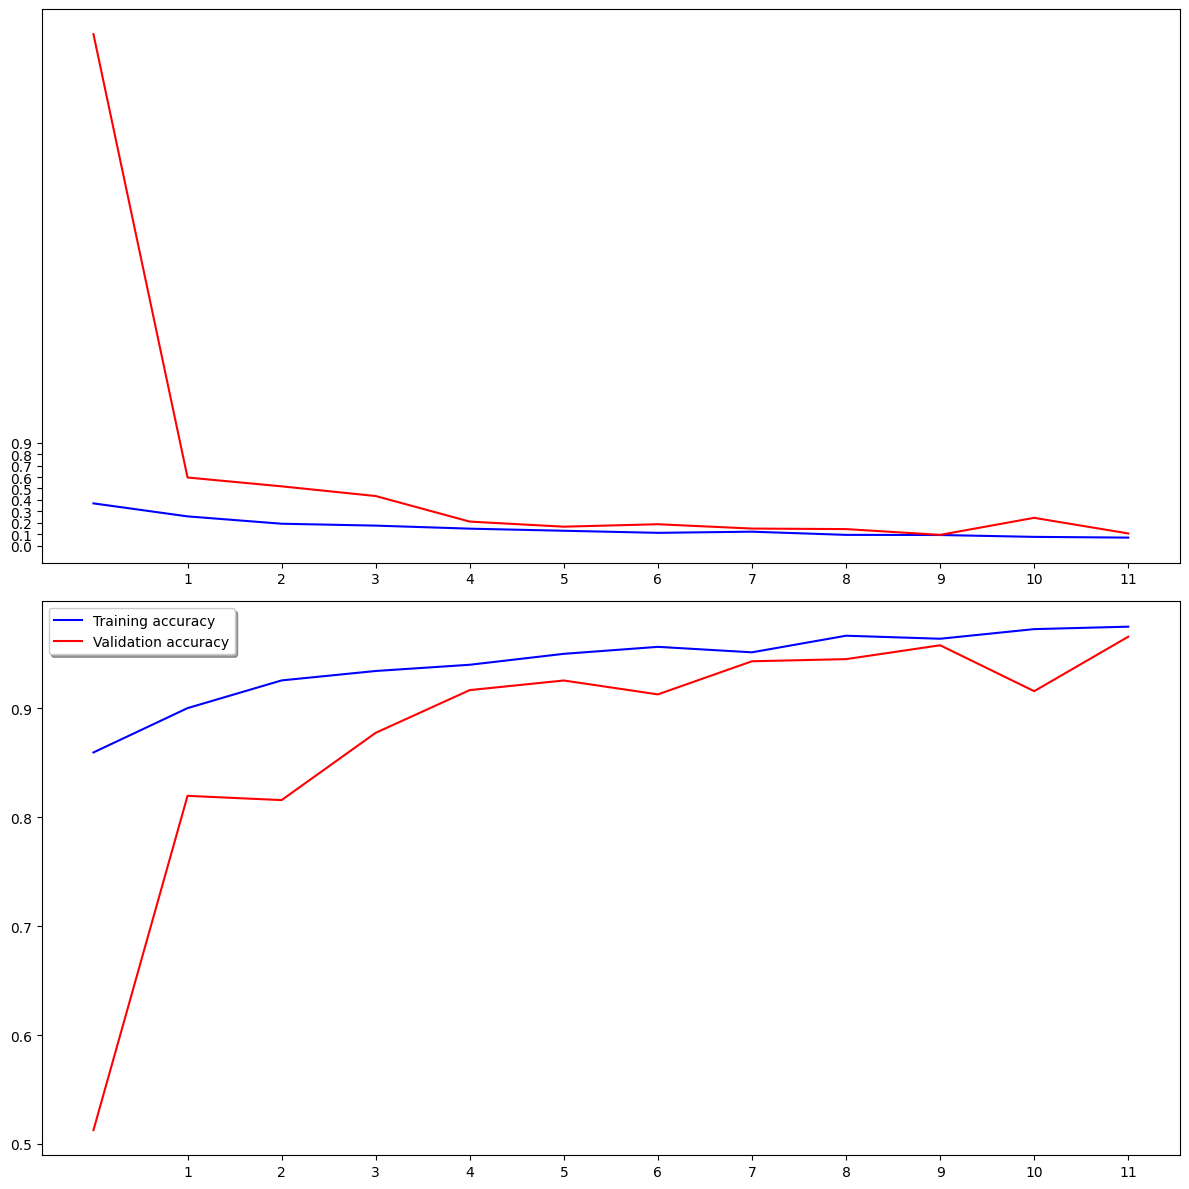

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")

ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


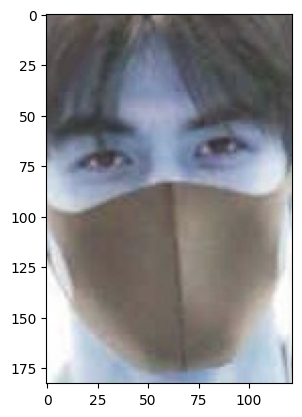

2024-03-15 22:42:39.718475: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4610: 3.93875, expected 3.42964
2024-03-15 22:42:39.718576: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14521: 3.93875, expected 3.42964
2024-03-15 22:42:39.718591: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15882: 6.56496, expected 5.80551
2024-03-15 22:42:39.718599: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15918: 5.95458, expected 5.19513
2024-03-15 22:42:39.718607: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15919: 6.47927, expected 5.71982
2024-03-15 22:42:39.718615: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15927: 6.48245, expected 5.723
2024-03-15 22:42:39.718622: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15928: 6.2255, expected 5.46605
2024-03-15 22:42:39.718630: E e

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
The person in the image is wearing a mask
Probability scores: [[2.4877298e-09 1.0000000e+00]]


In [23]:
input_image_path = '/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1032.jpg'
input_image = cv2.imread(input_image_path)

input_image = cv2.imread(input_image_path)

imgplot = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_resized = np.expand_dims(input_image_resized, axis=0)  # Add batch dimension
input_image_resized = input_image_resized.astype('float32') / 255.0  # Normalize the image

# Use the model to make predictions
predictions = model.predict(input_image_resized)

# Interpret the predictions
predicted_class = np.argmax(predictions)

# Print the predicted class
if predicted_class == 0:
    print('The person in the image is not wearing a mask')
elif predicted_class == 1:
    print('The person in the image is wearing a mask')
# Add more elif conditions for additional classes if needed

# Optionally, you can print the probability scores for each class
print('Probability scores:', predictions)